## FlatIterableView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` wraps the `Views.flatIterable()` method of ImgLib2, taking any `RandomAccessibleInterval` and providing an `IterableInterval` output that iterates with a [`FlatIterationOrder`](http://javadoc.scijava.org/ImgLib2/net/imglib2/FlatIterationOrder.html) (where an increment in the cursor increases the position in the first dimension by 1, then, when the cursor is at the last position in a particular dimension, the cursor resets the position in the first dimension to 0 and increments the position in the second dimension). This can be particularily useful if it is of vital importance that you iterate an image in this method, as there are some types of images (for example, [`CellImg`](http://javadoc.scijava.org/ImgLib2/net/imglib2/img/cell/CellImg.html)) that do not iterate in this order.

In [2]:
ij.op().help('flatIterableView')

Available operations:
	(IterableInterval out) =
	net.imagej.ops.transform.flatIterableView.DefaultFlatIterableView(
		RandomAccessibleInterval in)

Let's create a `CellImg` and iterate over it, to show that this iteration order is not flat. We will assign a unique, increasing value to each pixel to show the order:

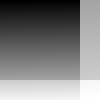

In [3]:
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.img.cell.CellImgFactory
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory

//note that the factory is constructed with the type of the image and then the size of the cells within the image.
//This has nothing to do with the size of the image itself.
imgFactory = new CellImgFactory(new FloatType(), 80, 80)

//here we create the image (with the numbers denoting the image size)
cellImg = imgFactory.create(100, 100)

cursor = cellImg.cursor()

value = 1

while(cursor.hasNext()){
    cursor.next().set(value++)
}

ij.notebook().display(cellImg)

As you can see, there is in fact a ramp within each of the cells, however the `Cursor` did **not** iterate in a flat iteration order. Let's transform this `CellImg` using `flatIterable` and create a ramp across the whole image:

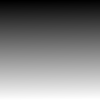

In [4]:
flat = ij.op().run("flatIterableView", cellImg)

flatIterableCursor = flat.cursor()

value = 1

while(flatIterableCursor.hasNext()){
    flatIterableCursor.next().set(value++)
}

ij.notebook().display(flat)

Note that `flatIterable` is one of the transform `Op`s, and all such `Op`s return a [`View`](http://javadoc.scijava.org/ImgLib2/net/imglib2/view/Views.html). This `View` actually updates the underlying image (i.e. `cellImg`), and as such if we look at `cellImg` it is exactly the same as `flat`, a reason as to why `flatIterable` can be very useful:

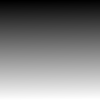

In [5]:
ij.notebook().display(cellImg)